Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Connor McDonald"
StudentNumber = "u16040725"

---

# MIT 804 2021: Homework 3, part 1 [10 points]
## Python 101 and Hill Vanilla Climbing

**You will learn how to:**
- Use jupyter notebook
- Get comfortable with numpy
- Implement parts vanilla hill climbing

By Dr Vukosi Marivate - vukosi.marivate@cs.up.ac.za

For MIT 804, University of Pretoria

## 1 Packages ##

Here are the packages you will be using for this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.

A quick crash course on Python and numpy can be found here [Python Numpy Tutorial](http://cs231n.github.io/python-numpy-tutorial/) (**Note**: For now we are just focused on numpy)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 2 Generate some data [1 dimension] ##



In [3]:
x_range = np.arange(-10,11,1) # Generate numbers from -10 to 10 as stps of one
print(x_range) # Print out the numbers

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


## 3 Create a fitness function, through a python function [3 points]

We would like to create our first fitness function. It will be a simple square function. But because we will be maximising, we will make it negated.

output = $-(x-2)^2+7$

**Hint**: Use the `np.square` function or **2 

In [4]:
def fitness_function(x):
    output = -1*(x-2)**2 +7
#     raise NotImplementedError()
    return output

In [5]:
"""Check that squares returns the correct output for several inputs"""
assert fitness_function(1) == 6
assert fitness_function(2) == 7
assert fitness_function(-3) == -18

In [6]:
# Create a range of x values from 10 to 10 with step size 1
x_range = range(-17,21,1)

output_list = []
for x in x_range: # Loop through the x values
    output = fitness_function(x) # Calculate the fitness function
    output_list.append(output) # Store the fitness function in the python list

print("x input: ", list(x_range))
print("fitness ouput: ",output_list)

x input:  [-17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
fitness ouput:  [-354, -317, -282, -249, -218, -189, -162, -137, -114, -93, -74, -57, -42, -29, -18, -9, -2, 3, 6, 7, 6, 3, -2, -9, -18, -29, -42, -57, -74, -93, -114, -137, -162, -189, -218, -249, -282, -317]


## 4 Plot the fitness function function

Text(0, 0.5, 'fitness')

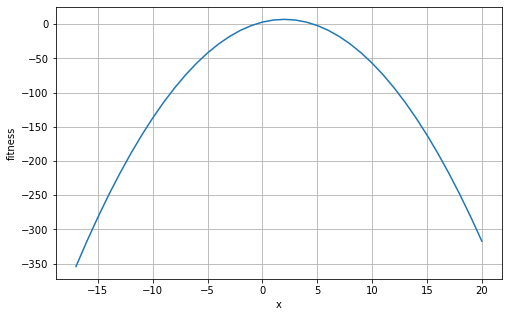

In [7]:
plt.figure(figsize=(8,5)) # Set the figure size
plt.plot(x_range,output_list) # Simple plot, x vs fitness function
plt.grid() # Put a grid

# Label the plot
plt.xlabel("x")
plt.ylabel("fitness")

## 5 Hill Climbing [4 points]

You will now impliment the hill climbing algorithm. You will implement the main loop in the algorithm. I
n python ou can pass function as a variable. 

For hill climbing

**Inputs**: 'fitness_function', max_iterations

Steps for **you** to implment:
1. Initialise $x$ (**Hint**: use the `np.random.randint` function to initialise the initial $x$ as an integer between -20, and 20)
2. Create $y$, a neighbour or next sample by adding a random number between -1.0 and 1.0 to $x$,  (**Hint**: use the `np.random.uniform` function)

**Output**: best_x (the best x we have found), best_fitness_value_history (to keep track of the best values we have found)

In [8]:
def hill_climbing(fitness_function, max_iteration = 10):
    """
    Vanilla hill climbing. Input is the fitness function, and the maximum number of iterations 
    """
    
    ## Initialise the x value
    x = np.random.randint(-20,21)
#     raise NotImplementedError()
    
    # Default initial values for the best we have seen
    best_x = x
    best_fitness_value = fitness_function(x) # calculate the initial fitness function for x
    
    iteration = 0
    best_fitness_value_history = [] # We want to keep a history of what we have seen in the past in terms of best fitness
    while iteration < max_iteration:
        
        # Create y
        y = x + np.random.uniform(-1,1)
#         raise NotImplementedError()
        
        y_fitness = fitness_function(y)
        if y_fitness > best_fitness_value: # If new fitness value is better than the best we have seen in the past, update
            best_x = y # Update best x
            best_fitness_value = y_fitness # Update best fitness value
            best_fitness_value_history.append(best_fitness_value) # Store best_finess_value history
            x = y # update x
        iteration += 1 # update number of iterations
        
    return best_x, best_fitness_value_history

In [9]:
# We should converge to near 2
best_x, best_fitness_value_history = hill_climbing(fitness_function, max_iteration= 200)
assert best_x < 2.1
assert best_x > 1.9
best_x, best_fitness_value_history = hill_climbing(fitness_function, max_iteration= 200)
assert best_x < 2.1
assert best_x > 1.9
best_x, best_fitness_value_history = hill_climbing(fitness_function, max_iteration= 200)
assert best_x < 2.1
assert best_x > 1.9

In [10]:
print("Best X: %s, Best Fitness %s" % (best_x, fitness_function(best_x)))

Best X: 2.002217670003602, Best Fitness 6.999995081939755


## Lets look at the optimisation or learning curve

Text(0.5, 1.0, 'History of best_fitness_value saves')

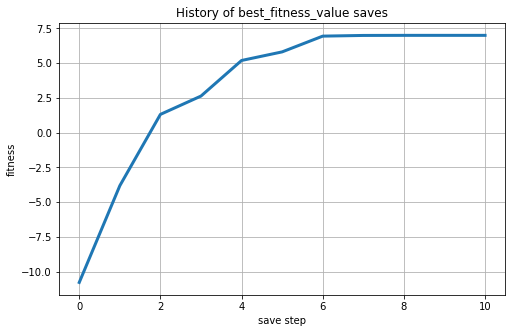

In [11]:
plt.figure(figsize=(8,5)) # Set the figure size
plt.plot(best_fitness_value_history, linewidth=3)
plt.grid()
# Label the plot
plt.xlabel("save step")
plt.ylabel("fitness")
plt.title("History of best_fitness_value saves")

## 6 Hill Climbing Behaviour [3 points]

What do you observe in the behavour of hill climbing when you look at the 'History of best_fitness_value saves'? 

**Note:** At least 1 sentence per point

-The plot of this algorithm highlights the "greedy" characteristic of the hill climbing algorthm, meaning that the plot should never decrease as it only accepts the succesive point if it is a greater value than the current point.

-Furthermore, a new plot is generated each time the code is run due to the random component. However, they all trace out the same general pattern as they converge on an optimal value, the only difference being that some runs take more steps than others. This shows the importance of selecting a starting point close to the optimal value rather than picking one blindly.

-This plot highlights one of the major flaws of the hill climbing algorithm, which is that it will converge on a local optimum which is closest to the starting point and not necessarily the global optimum. This function would not have worked as accurately if our function had more than one local maximum.